In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb
%matplotlib inline

In [91]:
# import county data
counties = pd.read_csv('county_data.csv', dtype={'FIPS': object})
# remove unwanted strings from food insecurity rate column 'insecure_perc'
counties['insecure_perc'] = counties['insecure_perc'].map(lambda x: x.rstrip('%'))
# convert two columns to be numeric
counties['poverty_per'] = pd.to_numeric(counties.poverty_per, errors='coerce')
counties['insecure_perc'] = pd.to_numeric(counties.insecure_perc)

In [3]:
# covid data
covid = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv',
                    dtype={'fips': object})
# capitalize fips column name
covid.rename(columns={'fips': 'FIPS'}, inplace=True)
# setting the date column to be of type datetime
covid['date'] = pd.to_datetime(covid['date'])
print(covid.shape)

(72988, 6)


In [4]:
# NYC FIPS = '36061'
covid.loc[covid['county'] == 'New York City', 'FIPS'] = '36061'

In [5]:
# most recent date
most_recent = covid['date'].max()
# total # cases
NYT_total = covid[covid['date']==most_recent]['cases'].sum()
print('As of {}/{}/{}, there are {} COVID-19 cases.'.format(most_recent.month, most_recent.day, most_recent.year, f"{NYT_total:,}"))

As of 4/19/2020, there are 753,319 COVID-19 cases.


**The total number of cases and number of new cases over time for the entire country**

In [6]:
# total cases per day
daily_cases = covid.groupby(['date'])['cases'].sum().reset_index()
# total deaths per day
daily_deaths = covid.groupby(['date'])['deaths'].sum().reset_index()
# merging the two dfs
daily_cases = pd.merge(daily_cases, daily_deaths, left_on='date', right_on='date')
# adding daily new cases and deaths columns
daily_cases['new_cases'] = daily_cases['cases'].sub(daily_cases['cases'].shift())
daily_cases['new_deaths'] = daily_cases['deaths'].sub(daily_cases['deaths'].shift())
# adding day numbers
daily_cases['day'] = np.arange(1, len(daily_cases)+1)

In [7]:
daily_cases[daily_cases['date']=='2020-03-31']

,date,cases,deaths,new_cases,new_deaths,day
70,2020-03-31,187961,3631,24358.0,723.0,71


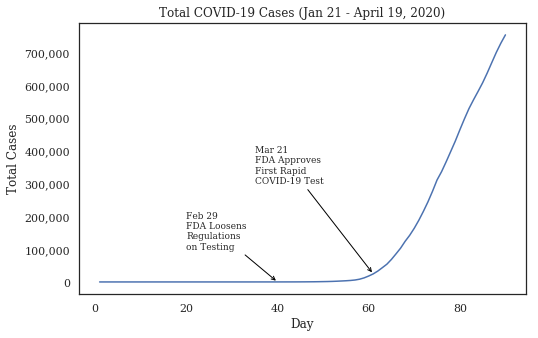

In [9]:
sb.set_context("paper")
sb.set(font='serif')
sb.set_style("white", {"font.family": "serif","font.serif": ["Times", "Palatino", "serif"]})
fig, ax = plt.subplots(figsize = [8,5])
sb.lineplot(data = daily_cases, x = daily_cases['day'], y = daily_cases['cases']);
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','));
ax.yaxis.set_major_formatter(comma_fmt)
plt.title('Total COVID-19 Cases (Jan 21 - April 19, 2020)');
plt.xlabel('Day');
plt.ylabel('Total Cases');
plt.annotate('Feb 29\nFDA Loosens\nRegulations\non Testing',
             fontsize=9,
             xy=(40, 70),  
             xycoords='data',
             xytext=(20, 100000),
             arrowprops=dict(arrowstyle="->", color='black', lw=1));
plt.annotate('Mar 21\nFDA Approves\nFirst Rapid\nCOVID-19 Test',
             fontsize=9,
             xy=(61, 24511),  
             xycoords='data',
             xytext=(35, 300000),
             arrowprops=dict(arrowstyle="->", color='black', lw=1));

In [10]:
fig.savefig(fname='plots/total_cases.png', dpi=300);

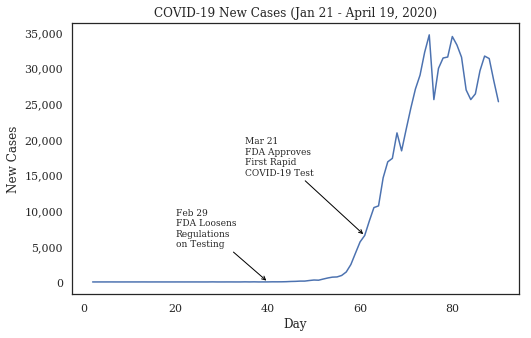

In [11]:
sb.set_context("paper")
sb.set(font='serif')
sb.set_style("white", {"font.family": "serif","font.serif": ["Times", "Palatino", "serif"]})
fig, ax = plt.subplots(figsize = [8,5])
sb.lineplot(data = daily_cases, x = daily_cases['day'], y = daily_cases['new_cases']);
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','));
ax.yaxis.set_major_formatter(comma_fmt)
plt.title('COVID-19 New Cases (Jan 21 - April 19, 2020)');
plt.xlabel('Day');
plt.ylabel('New Cases');
plt.annotate('Feb 29\nFDA Loosens\nRegulations\non Testing',
             fontsize=9,
             xy=(40, 5),  
             xycoords='data',
             xytext=(20, 5000),
             arrowprops=dict(arrowstyle="->", color='black', lw=1));
plt.annotate('Mar 21\nFDA Approves\nFirst Rapid\nCOVID-19 Test',
             fontsize=9,
             xy=(61, 6512),  
             xycoords='data',
             xytext=(35, 15000),
             arrowprops=dict(arrowstyle="->", color='black', lw=1));

In [12]:
fig.savefig(fname='plots/daily_new_cases.png', dpi=300);

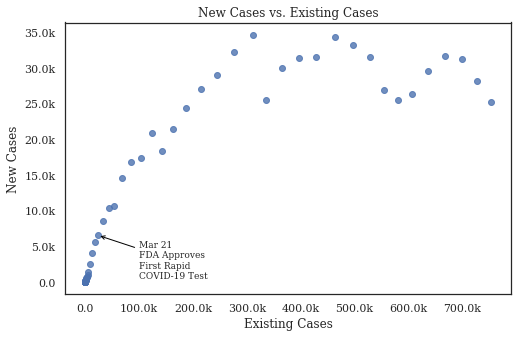

In [13]:
sb.set_context("paper")
sb.set(font='serif')
sb.set_style("white", {"font.family": "serif","font.serif": ["Times", "Palatino", "serif"]})
fig, ax = plt.subplots(figsize = [8,5])
sb.regplot(data = daily_cases, x = daily_cases['cases'], y = daily_cases['new_cases'], fit_reg=False);
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','));
def thousands(x, pos):
    'The two args are the value and tick position'
    if x < 1000:
        return x
    else:
        return '%1.1fk' % (x * 1e-3)
thous = FuncFormatter(thousands)
ax.yaxis.set_major_formatter(thous)
ax.xaxis.set_major_formatter(thous)
plt.title('New Cases vs. Existing Cases');
plt.xlabel('Existing Cases');
plt.ylabel('New Cases');
plt.annotate('Mar 21\nFDA Approves\nFirst Rapid\nCOVID-19 Test',
             fontsize=9,
             xy=(24511, 6512),  
             xycoords='data',
             xytext=(100000, 500),
             arrowprops=dict(arrowstyle="->", color='black', lw=1));

In [14]:
fig.savefig(fname='plots/total_vs_new_cases.png', dpi=300);

## Descriptive Stats

In [19]:
variables = ['cases', 'deaths', 'insecure_perc', 'pop_den_permile', 'poverty_per', 'white_per', 'black_per']
stats = counties[variables].describe()
stats.to_csv('tables/summary_stats_demographics.csv')
stats

,cases,deaths,insecure_perc,pop_den_permile,poverty_per,white_per,black_per
count,2742.000000,2742.000000,3143.000000,3127.000000,3142.000000,3143.000000,3143.000000
mean,272.372721,13.014588,13.251639,256.434890,15.163304,84.458555,9.338106
std,2872.067238,194.870319,3.959942,1719.713783,6.124835,16.394723,14.472795
min,1.000000,0.000000,2.900000,0.000000,2.600000,3.841985,0.000000
25%,4.000000,0.000000,10.600000,17.000000,10.800000,79.581916,0.867400
50%,16.000000,0.000000,12.800000,45.200000,14.100000,91.392664,2.543449
75%,65.000000,2.000000,15.200000,113.500000,18.300000,95.521506,10.855604
max,134446.000000,9708.000000,36.300000,69468.400000,54.000000,99.043785,86.069762


In [20]:
variables = ['lapop1', 'lalowi1', 'laseniors1', 'lawhite1', 'lablack1', 'lahunv1', 'lapop10',
             'lalowi10', 'laseniors10', 'lawhite10', 'lablack10', 'lahunv10']
stats = counties[variables].describe()
stats.to_csv('tables/summary_stats_foodaccessability.csv')
stats

,lapop1,lalowi1,laseniors1,lawhite1,lablack1,lahunv1,lapop10,lalowi10,laseniors10,lawhite10,lablack10,lahunv10
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,64.853507,23.979805,10.297337,55.333958,5.005065,1.272281,12.372300,4.792440,2.290314,10.554234,0.577434,0.255553
std,19.741853,11.564173,4.591003,20.084228,9.723430,1.116942,20.960624,8.509418,4.193525,18.569849,2.645282,0.864507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.527736,15.239630,7.332604,42.706424,0.231633,0.656618,0.352949,0.115133,0.051417,0.309913,0.000000,0.002270
50%,66.403185,22.876906,10.020820,56.232913,0.762722,1.057376,3.949291,1.431767,0.643842,3.315507,0.014166,0.049320
75%,78.373358,32.006766,12.789439,69.096864,4.358771,1.586255,14.968922,5.429540,2.601341,12.086237,0.103983,0.218172
max,100.000001,73.418604,29.977290,99.163179,70.732864,19.988265,100.000001,71.844209,29.146426,99.163179,50.136324,19.988265


## Histograms

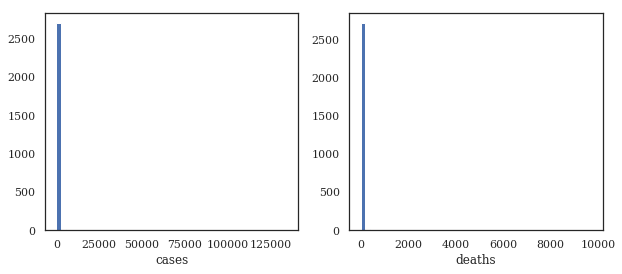

In [47]:
sb.set_context("paper")
sb.set(font='serif')
sb.set_style("white", {"font.family": "serif","font.serif": ["Times", "Palatino", "serif"]})
fig, ax = plt.subplots(figsize = [10,4])
# histogram on left
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
thous = FuncFormatter(thousands)
ax.yaxis.set_major_formatter(thous)
ax.xaxis.set_major_formatter(thous)
sb.distplot(counties['cases'], bins=50, kde = False, hist_kws = {'alpha' : 1});
# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sb.distplot(counties['deaths'], bins=50, kde = False, hist_kws = {'alpha' : 1});

In [41]:
fig.savefig(fname='plots/cases_deaths_hist.png', dpi=300);

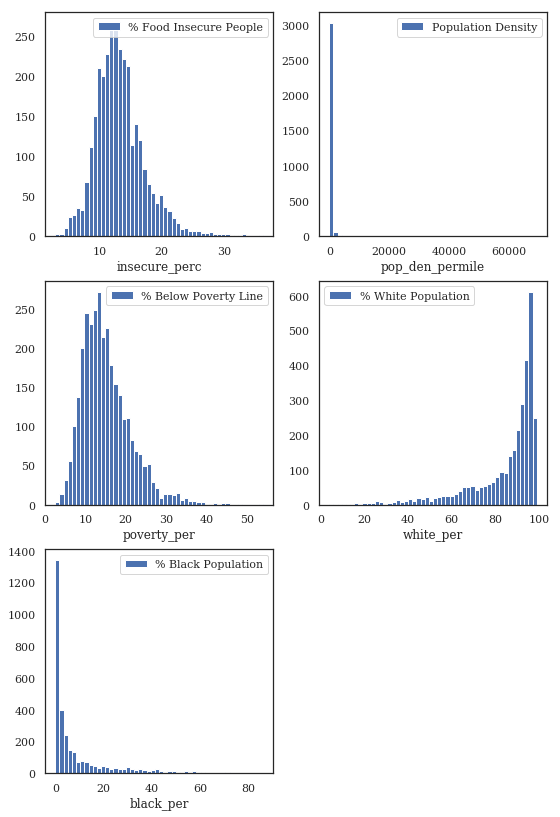

In [42]:
sb.set_context("paper")
sb.set(font='serif')
sb.set_style("white", {"font.family": "serif","font.serif": ["Times", "Palatino", "serif"]})
fig, ax = plt.subplots(figsize = [9,14])
plt.subplot(3, 2, 1) 
sb.distplot(counties['insecure_perc'], bins=50, kde = False, hist_kws = {'alpha' : 1}, label='% Food Insecure People');
plt.legend();
plt.subplot(3, 2, 2) 
sb.distplot(counties['pop_den_permile'], bins=50, kde = False, hist_kws = {'alpha' : 1}, label='Population Density');
plt.legend();
plt.subplot(3, 2, 3) 
sb.distplot(counties['poverty_per'], bins=50, kde = False, hist_kws = {'alpha' : 1}, label='% Below Poverty Line');
plt.legend();
plt.subplot(3, 2, 4) 
sb.distplot(counties['white_per'], bins=50, kde = False, hist_kws = {'alpha' : 1}, label='% White Population');
plt.legend();
plt.subplot(3, 2, 5) 
sb.distplot(counties['black_per'], bins=50, kde = False, hist_kws = {'alpha' : 1}, label='% Black Population');
plt.legend();

In [43]:
fig.savefig(fname='plots/demographics_hist.png', dpi=300);

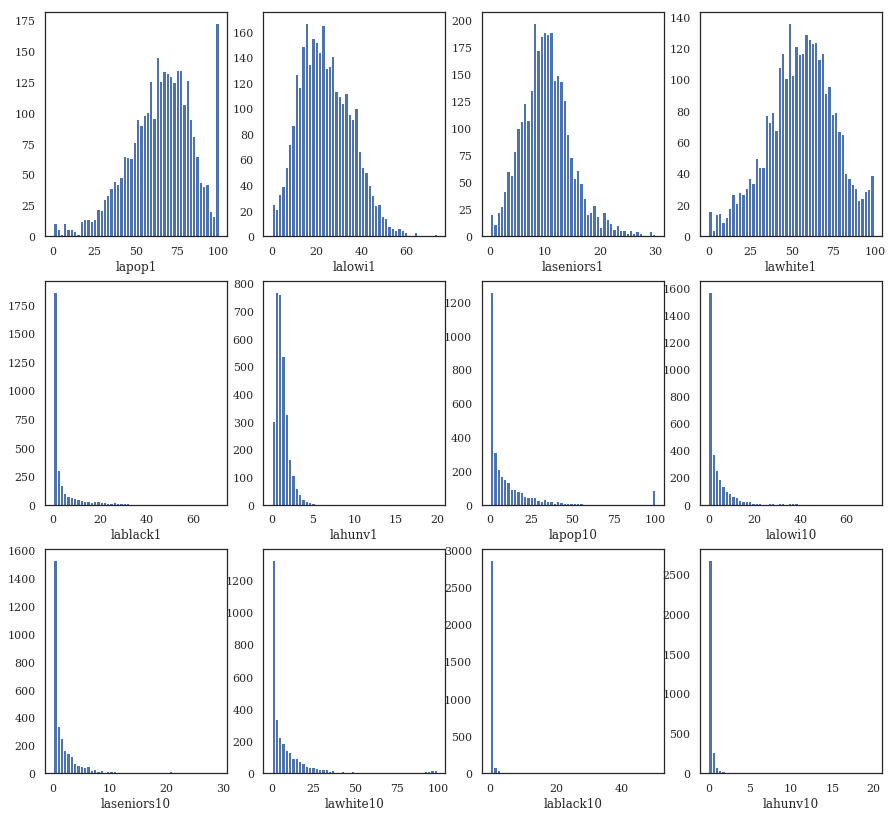

In [53]:
fig, ax = plt.subplots(figsize = [15,14])
plt.subplot(3, 4, 1) 
sb.distplot(counties['lapop1'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 2) 
sb.distplot(counties['lalowi1'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 3) 
sb.distplot(counties['laseniors1'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 4) 
sb.distplot(counties['lawhite1'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 5) 
sb.distplot(counties['lablack1'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 6) 
sb.distplot(counties['lahunv1'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 7) 
sb.distplot(counties['lapop10'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 8) 
sb.distplot(counties['lalowi10'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 9) 
sb.distplot(counties['laseniors10'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 10) 
sb.distplot(counties['lawhite10'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 11) 
sb.distplot(counties['lablack10'], bins=50, kde = False, hist_kws = {'alpha' : 1});
plt.subplot(3, 4, 12) 
sb.distplot(counties['lahunv10'], bins=50, kde = False, hist_kws = {'alpha' : 1});

In [54]:
fig.savefig(fname='plots/foodaccess_hist.png', dpi=300);

## Correlations

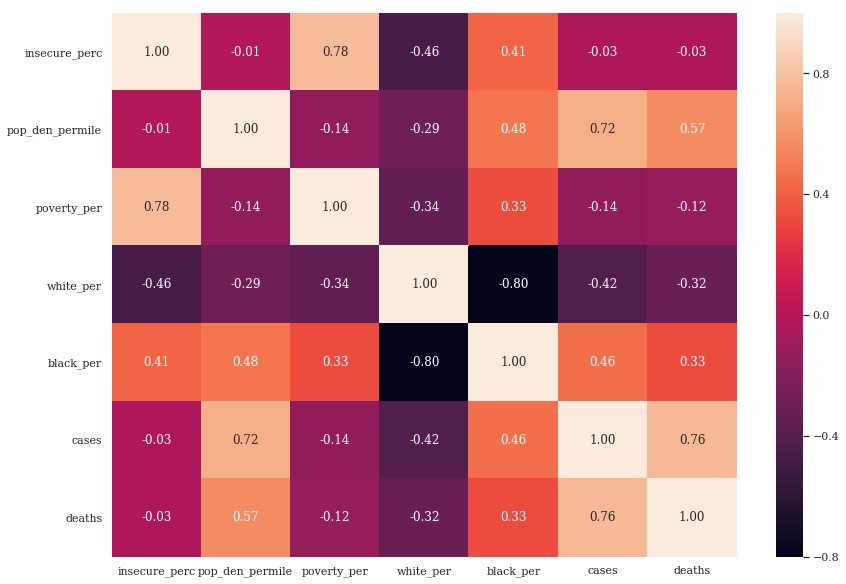

In [62]:
# correlation matrix
variables = ['insecure_perc', 'pop_den_permile', 'poverty_per', 'white_per', 'black_per', 'cases', 'deaths']
fig, ax = plt.subplots(figsize = [14,10])
sb.heatmap(counties[variables].corr(method='spearman'), annot=True, fmt='0.2f');

In [63]:
fig.savefig(fname='plots/spearman_correlation_demographics.png', dpi=300);

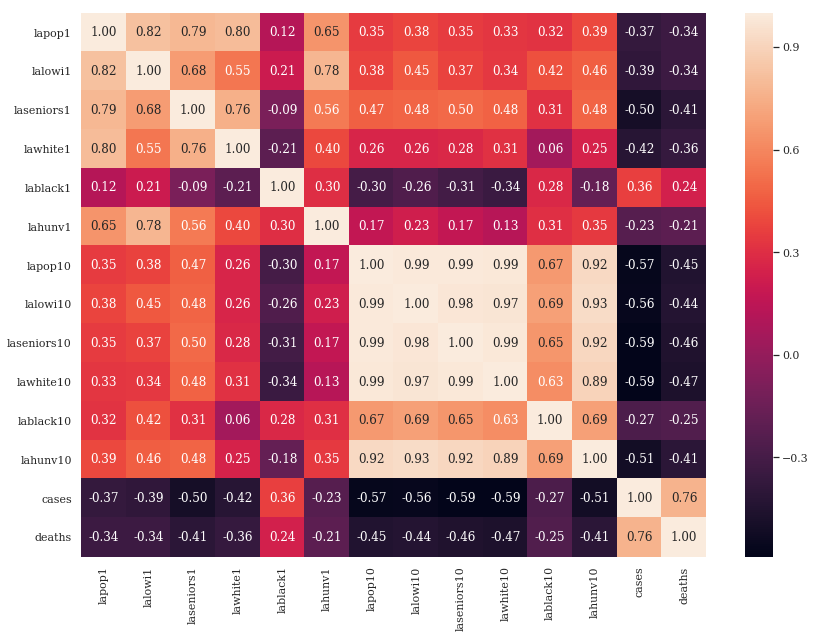

In [64]:
# correlation matrix
variables = ['lapop1', 'lalowi1', 'laseniors1', 'lawhite1', 'lablack1', 'lahunv1', 'lapop10',
             'lalowi10', 'laseniors10', 'lawhite10', 'lablack10', 'lahunv10', 'cases', 'deaths']
fig, ax = plt.subplots(figsize = [14,10])
sb.heatmap(counties[variables].corr(method='spearman'), annot=True, fmt='0.2f');

In [65]:
fig.savefig(fname='plots/spearman_correlation_foodaccess.png', dpi=300);

**P-values using Scipy**

In [71]:
from scipy import stats

SpearmanrResult(correlation=nan, pvalue=nan)

In [102]:
no_null = counties[counties['cases'].notna()]
#no_null = no_null[no_null['pop_den_permile'].notna()]

In [106]:
stats.spearmanr(no_null['cases'], no_null['insecure_perc'])

SpearmanrResult(correlation=-0.027144952500190934, pvalue=0.15804799268440373)

## Scatter Plots

c:\python371\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


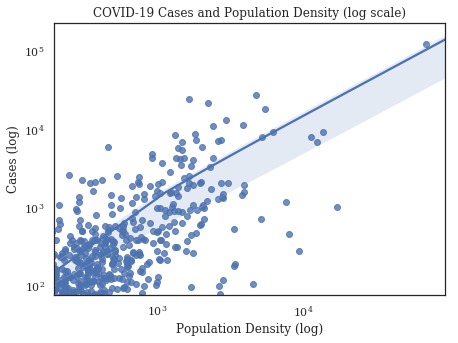

In [109]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xscale="log", yscale="log");
sb.regplot(data = counties, x = counties['pop_den_permile'], y = counties['cases'], fit_reg=True);
plt.title('COVID-19 Cases and Population Density (log scale)');
plt.xlabel('Population Density (log)');
plt.ylabel('Cases (log)');

In [101]:
fig.savefig(fname='plots/density_vs_cases.png', dpi=300);